# IMPORTS

In [2]:
import pandas as pd
import numpy as np



# Loading our datasets into data frames

In [9]:

clubs = pd.read_csv("DataSets/clubs.csv")
players = pd.read_csv("DataSets/players.csv")
comps = pd.read_csv('DataSets/competitions.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'DataSets/appearances.csv'

# dropping nulls and removing completely empty columns

In [10]:
#players = players.na.drop()
columns_to_drop_from_clubs = ["coach_name", "total_market_value","filename","url"] # 100% missing
columns_to_drop_from_players = ["agent_name", "contract_expiration_date","first_name","last_name","image_url","url","current_club_domestic_competition_id","city_of_birth"] # uneccessary data with many nulls
columns_to_Drop_from_PV = ["datetime"]
columns_to_drop_from_comps = ["confederation","url","country_id"]

clubs = clubs.drop(columns = columns_to_drop_from_clubs)
players= players.drop(columns  = columns_to_drop_from_players)
comps = comps.drop(columns=columns_to_drop_from_comps)

players = players.dropna()
clubs = clubs.dropna()
comps =comps.dropna()
# player values has no nulls so no need to change anything



In [12]:
print("clubs",clubs.columns)
print("player",players.columns)
print("comps",comps.columns)

clubs Index(['club_id', 'club_code', 'name', 'domestic_competition_id', 'squad_size',
       'average_age', 'foreigners_number', 'foreigners_percentage',
       'national_team_players', 'stadium_name', 'stadium_seats',
       'net_transfer_record', 'last_season'],
      dtype='object')
player Index(['player_id', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm', 'current_club_name',
       'market_value_in_eur', 'highest_market_value_in_eur'],
      dtype='object')
comps Index(['competition_id', 'competition_code', 'name', 'sub_type', 'type',
       'country_name', 'domestic_league_code'],
      dtype='object')


# Performing the merge between the datasets

In [13]:
merged_df = pd.merge(clubs, players, left_on='club_id', right_on='current_club_id', how='inner')
print(merged_df.duplicated().sum())
merged_df = pd.merge(merged_df, comps, left_on='domestic_competition_id',right_on='competition_id', how='inner')
print(merged_df.duplicated().sum())









0
0


In [ ]:
merged_df.shape

(23129, 35)

# Saving joined data into new file 

In [ ]:
merged_df.to_csv("DataSets/integratedDataSet.csv", index=False)



In [14]:
df= pd.read_csv('DataSets/integratedDataSet.csv')

In [15]:
df = df.dropna()

# Abdallah's Questions !!

## Reseacrh question 1: which competitions have the most valuable players by age

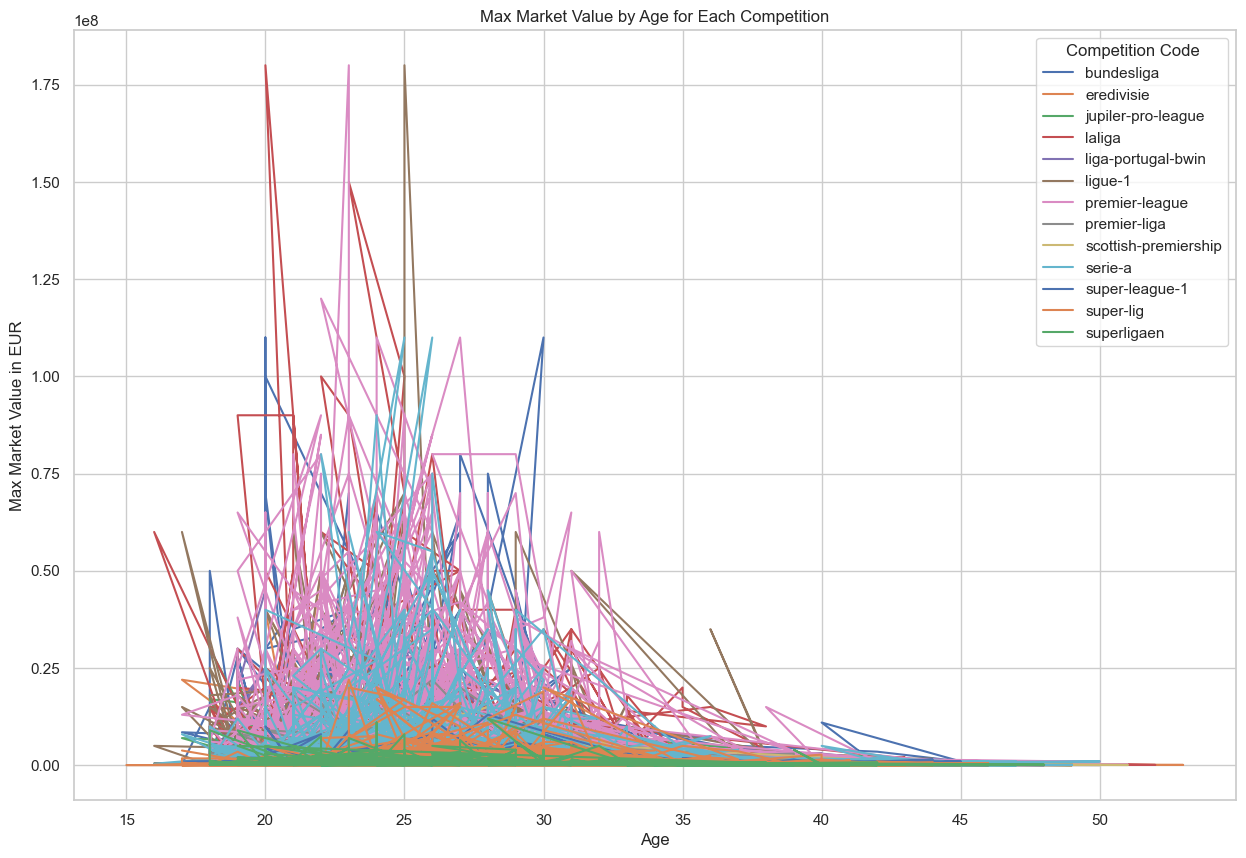

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'date_of_birth' to datetime
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

# Calculate age based on today's date
today = pd.to_datetime('today')
df['age'] = (today - df['date_of_birth']).dt.days // 365  
max_values = df.groupby('competition_code')['market_value_in_eur'].max()

plt.figure(figsize=(15, 10))

for competition_code, values in max_values.items():
    # Filter the DataFrame for each competition_code
    competition_df = df[df['competition_code'] == competition_code]
    
    plt.plot(competition_df['age'], competition_df['market_value_in_eur'], label=competition_code)

plt.title('Max Market Value by Age for Each Competition')
plt.xlabel('Age')
plt.ylabel('Max Market Value in EUR')
plt.legend(title='Competition Code')
plt.grid(True)
plt.show()

#### as we can see from the grid 4 leagues dominate the most valuable players through ages and they are 'laliga', 'premier league', 'ligue 1' , 'bundesliga'. The serie a is the closest league to those 4 which makes sense considering those 5 leagues are considered europe's 'top 5' leagues. there are 3 players that stand out being a lot more expensive than the rest, 1 of them is aged 20 and plays in laliga one is aged 23 and plays in the premier league and the last is 25 and plays in ligue 1. Also, we can clearly see that around 20-25 years old players tend to be at their most valuable. 

## Research question 2 : do leagues value different positions differently?

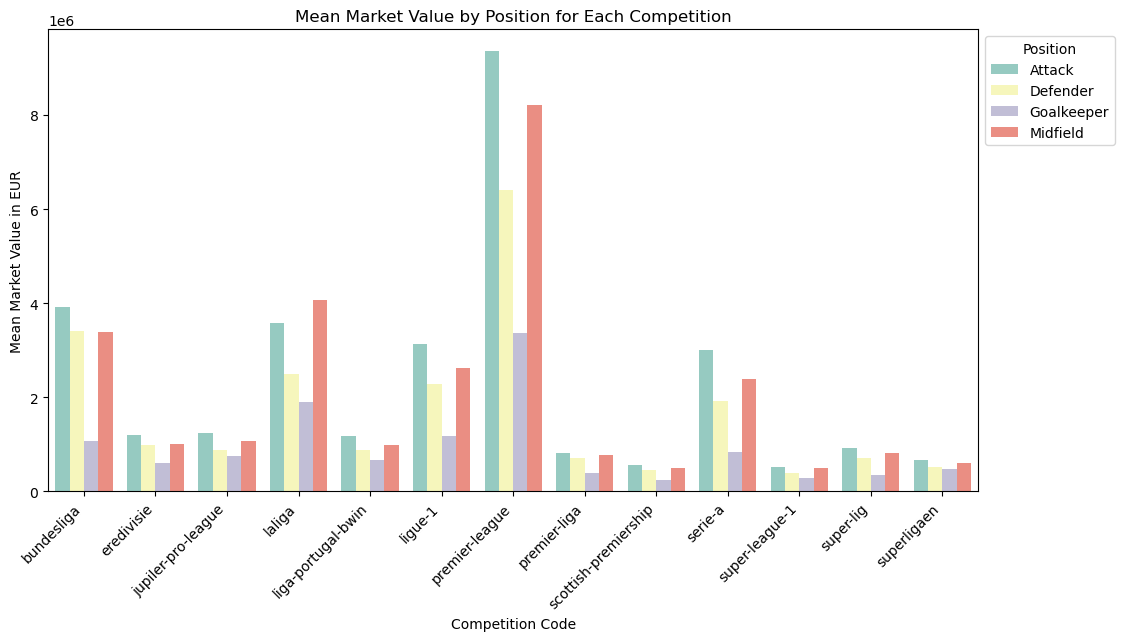

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group by 'competition_code' and 'position', calculate mean market value
mean_values = df.groupby(['competition_code', 'position'])['market_value_in_eur'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='competition_code', y='market_value_in_eur', hue='position', data=mean_values, palette='Set3')



plt.title('Mean Market Value by Position for Each Competition')
plt.xlabel('Competition Code')
plt.ylabel('Mean Market Value in EUR')
plt.legend(title='Position', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Shehata's questions!!!

# Question 1 : Which nation produces the most players that play in the highest valued competition?  

In [16]:
print(df.columns)

Index(['club_id', 'club_code', 'name_x', 'domestic_competition_id',
       'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name',
       'stadium_seats', 'net_transfer_record', 'last_season_x', 'player_id',
       'name_y', 'last_season_y', 'current_club_id', 'player_code',
       'country_of_birth', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm', 'current_club_name',
       'market_value_in_eur', 'highest_market_value_in_eur', 'competition_id',
       'competition_code', 'name', 'sub_type', 'type', 'country_name',
       'domestic_league_code'],
      dtype='object')


### getting the highest value competition

In [25]:
avg_market_value_by_competition = df.groupby('competition_id')['market_value_in_eur'].mean()
highest_valued_competition = avg_market_value_by_competition.idxmax()
highest_valued_competitions = df[df['competition_id'] == highest_valued_competition]
print(highest_valued_competition)

GB1


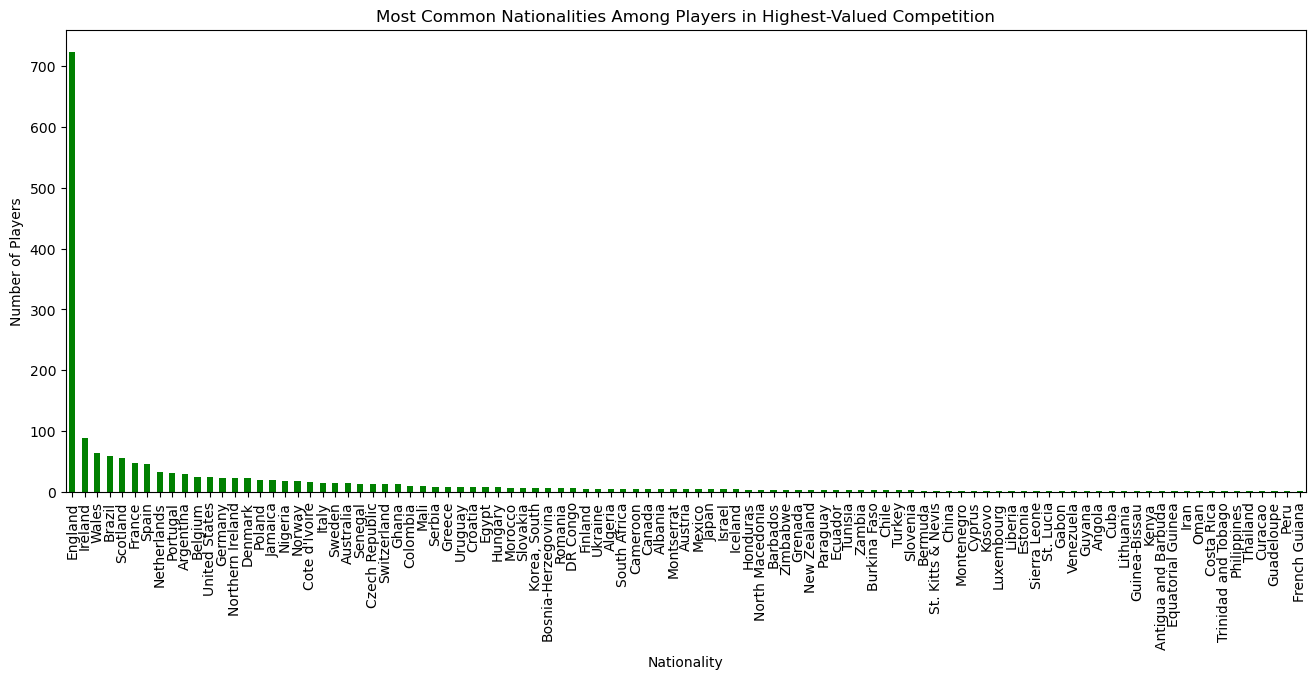

In [26]:


# Group by nationality and count the number of players for each nationality
nationality_counts = highest_valued_competitions['country_of_citizenship'].value_counts()

# Get the most common nationality
most_common_nationality = nationality_counts.idxmax()

# Plot the bar chart
plt.figure(figsize=(16, 6))
nationality_counts.plot(kind='bar', color='green')
plt.title('Most Common Nationalities Among Players in Highest-Valued Competition')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.show()

### As shown above it is clear that england is the country that produces the most players that play in the highest value competition (GB1 or Premier League) 

# Question 2: Does the number of foreigners in a club affect the club worth ?

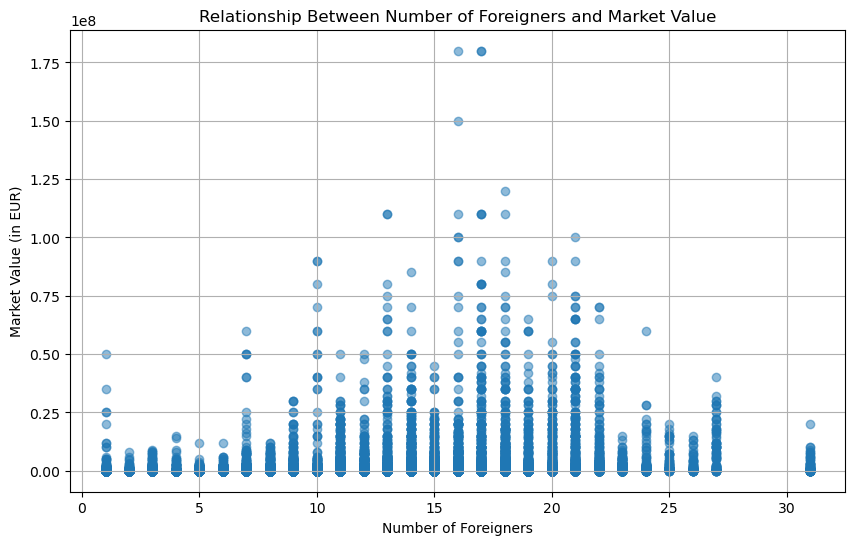

Correlation coefficient: 0.12495936956100516


In [31]:


club_data = df[['foreigners_number', 'market_value_in_eur']]
plt.figure(figsize=(10, 6))
plt.scatter(club_data['foreigners_number'], club_data['market_value_in_eur'], alpha=0.5)
plt.title('Relationship Between Number of Foreigners and Market Value')
plt.xlabel('Number of Foreigners')
plt.ylabel('Market Value (in EUR)')
plt.grid(True)
plt.show()



### The plot above shows that increasing the number of foreigners could slightly affect the Market value of the club positively with the peak between 15 to 20 players which forms a decent percentage of the squad